# Heart Disease Predictions

This notebook covers:
1. Data Acquisition & Exploratory Analysis
2. Data Preprocessing & Feature Engineering
3. Model Development & Training
4. Model Evaluation & Comparison
5. Experiment Tracking with MLflow
6. Model Packaging & Reproducibility
7. Model Predictions

In [1]:
# Import Required Libraries
import sys
import os
sys.path.insert(0, '../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
import mlflow
import mlflow.sklearn
import joblib
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


d:\Workspace\BITS MTECH\Sem3\MLOps\Assignment\mlops-assign-1\.venv\Lib\site-packages\pydantic\_internal\_fields.py:127: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
d:\Workspace\BITS MTECH\Sem3\MLOps\Assignment\mlops-assign-1\.venv\Lib\site-packages\pydantic\_internal\_config.py:269: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


## 1. Data Acquisition & Dataset Exploration

Load the Heart Disease UCI Dataset and explore its structure.

In [2]:
from data.download_data import download_heart_disease_data, load_and_prepare_data

# Download dataset
print("=" * 60)
print("STEP 1: DATA ACQUISITION")
print("=" * 60)

csv_path = download_heart_disease_data(output_dir='../data/raw')

if csv_path:
    df = load_and_prepare_data(csv_path)
    print("\nDataset successfully loaded!")

STEP 1: DATA ACQUISITION
Dataset successfully downloaded to ../data/raw\heart_disease.csv
Dataset shape: (303, 14)

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

First few rows:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

In [3]:
# Display dataset information
print("\n" + "=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Dataset Shape: {df.shape}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nBasic Statistics:\n{df.describe()}")


DATASET OVERVIEW
Dataset Shape: (303, 14)

Data Types:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Basic Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   


## 2. Exploratory Data Analysis (EDA)

Professional visualizations including feature distributions, correlations, and class balance.

In [4]:
print("\n" + "=" * 60)
print("STEP 2: EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 60)

# Clean the data first
df_clean = df.dropna()
print(f"Shape after removing missing values: {df_clean.shape}")

# Convert target to binary
df_clean['target'] = (df_clean['target'] > 0).astype(int)

print(f"\nTarget Distribution:")
print(df_clean['target'].value_counts())
print(f"\nTarget Distribution (%):")
print(df_clean['target'].value_counts(normalize=True) * 100)


STEP 2: EXPLORATORY DATA ANALYSIS (EDA)
Shape after removing missing values: (297, 14)

Target Distribution:
target
0    160
1    137
Name: count, dtype: int64

Target Distribution (%):
target
0    53.872054
1    46.127946
Name: proportion, dtype: float64


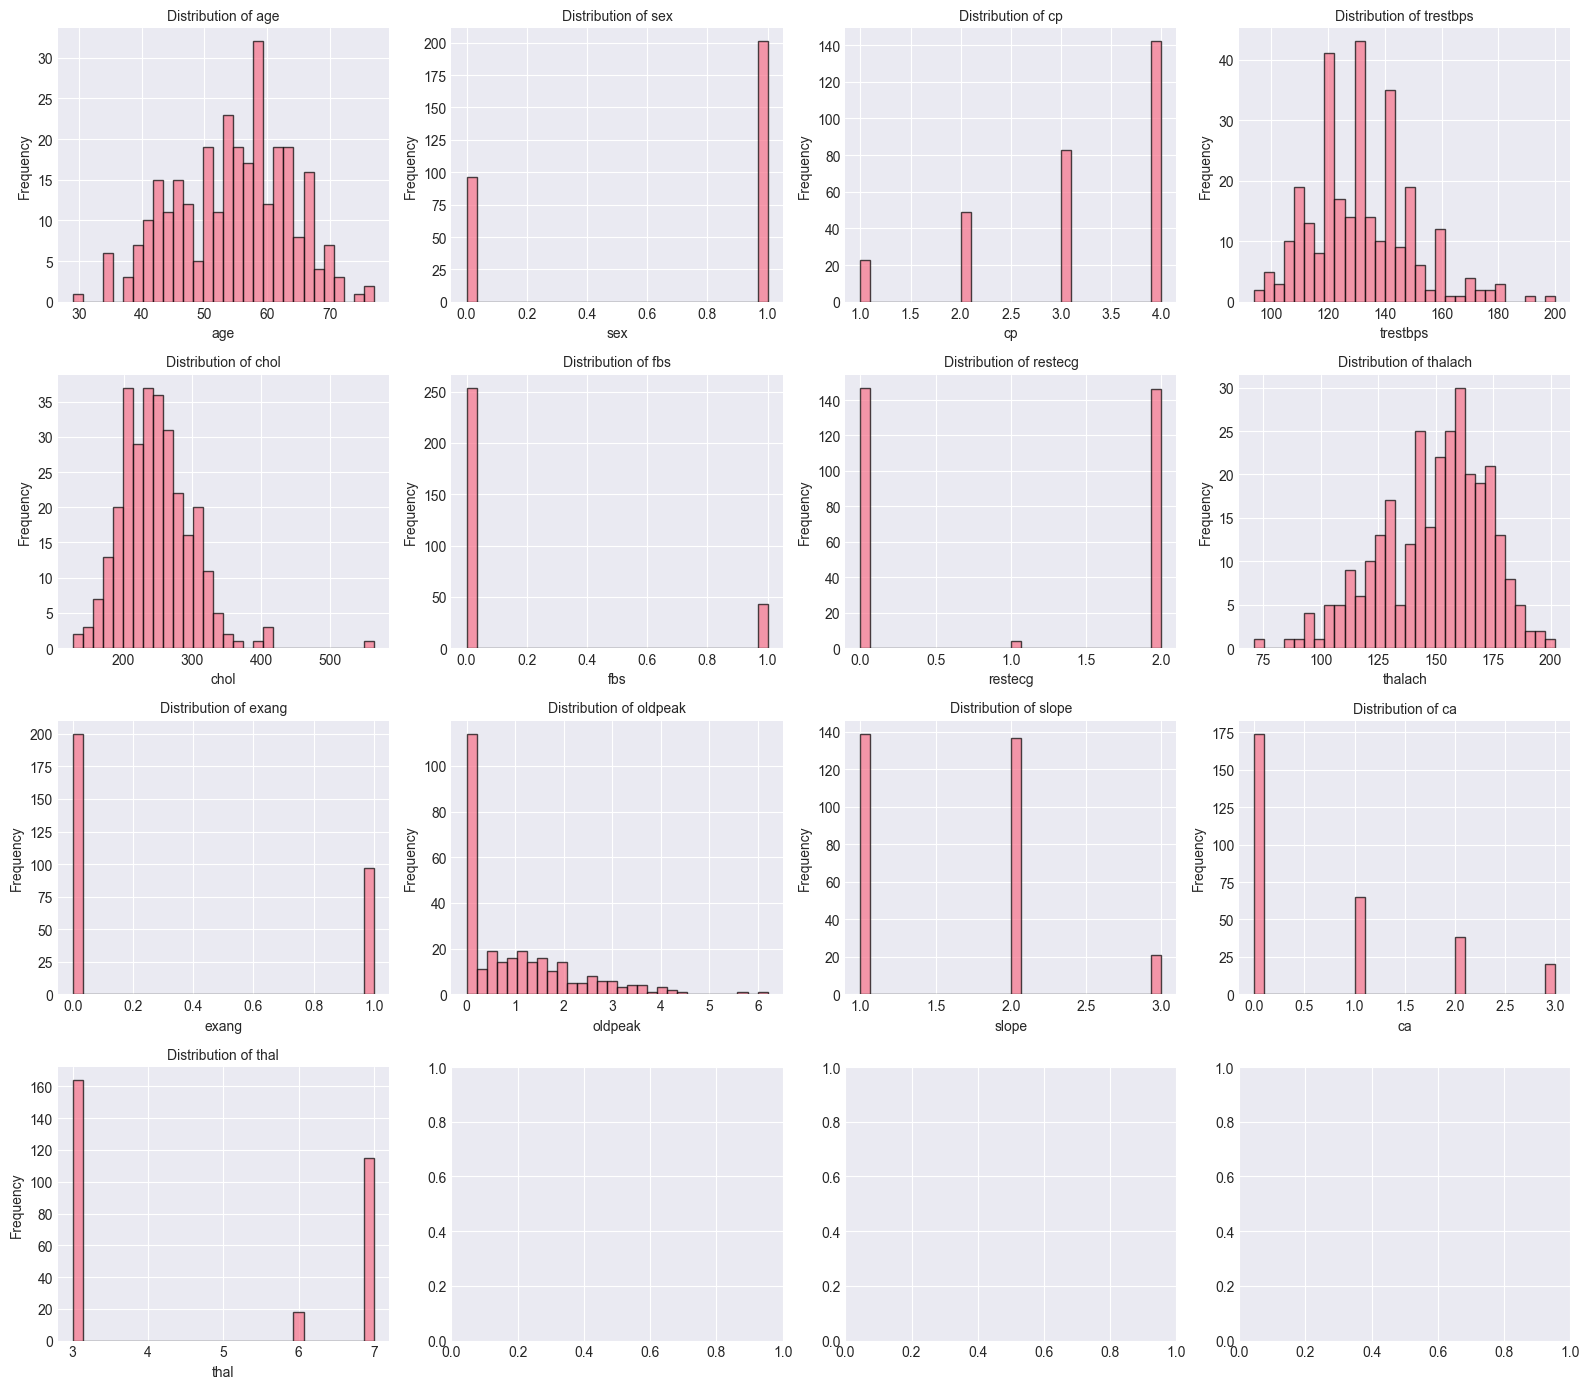

Feature distributions saved!


In [5]:
# 1. Feature Distributions (Histograms)
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(df_clean.columns):
    if col != 'target':
        axes[idx].hist(df_clean[col], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}', fontsize=10)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../screenshots/01_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Feature distributions saved!")

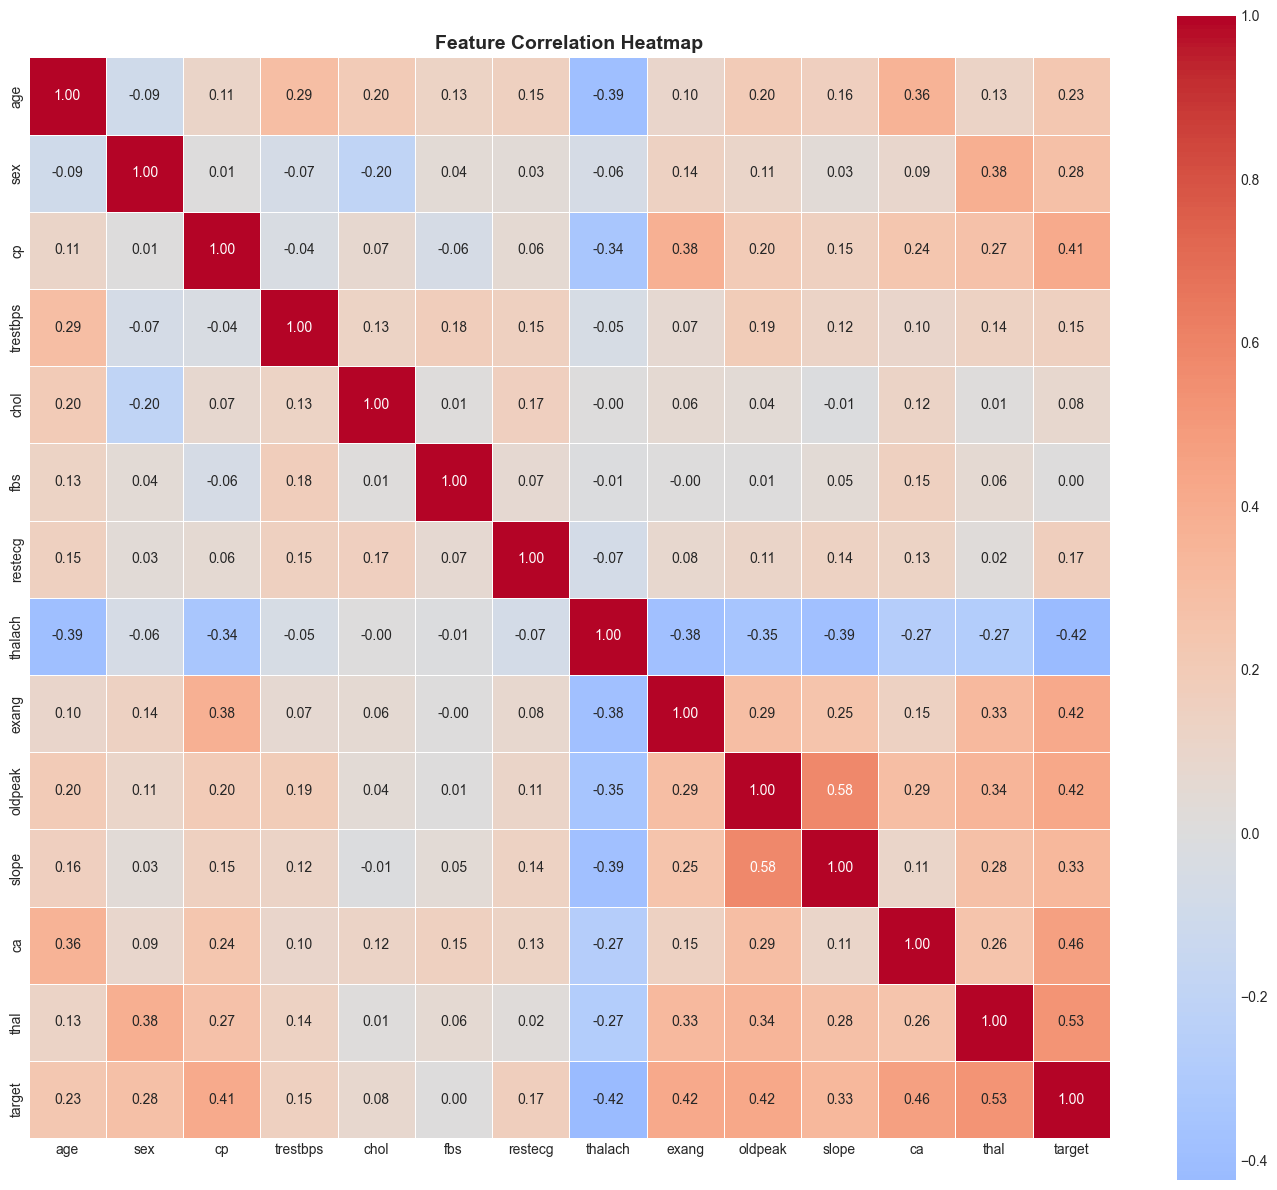

Correlation heatmap saved!


In [6]:
# 2. Correlation Heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../screenshots/02_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Correlation heatmap saved!")

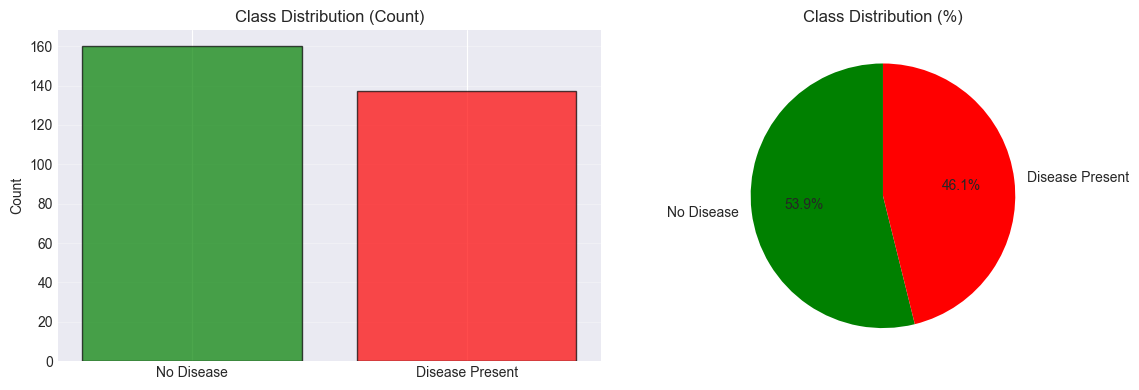

Class balance analysis saved!


In [7]:
# 3. Class Balance Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
target_counts = df_clean['target'].value_counts()
axes[0].bar(['No Disease', 'Disease Present'], target_counts.values, color=['green', 'red'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution (Count)')
axes[0].grid(axis='y', alpha=0.3)

# Percentage plot
target_pct = df_clean['target'].value_counts(normalize=True) * 100
axes[1].pie(target_pct.values, labels=['No Disease', 'Disease Present'], autopct='%1.1f%%',
           colors=['green', 'red'], startangle=90)
axes[1].set_title('Class Distribution (%)')

plt.tight_layout()
plt.savefig('../screenshots/03_class_balance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Class balance analysis saved!")

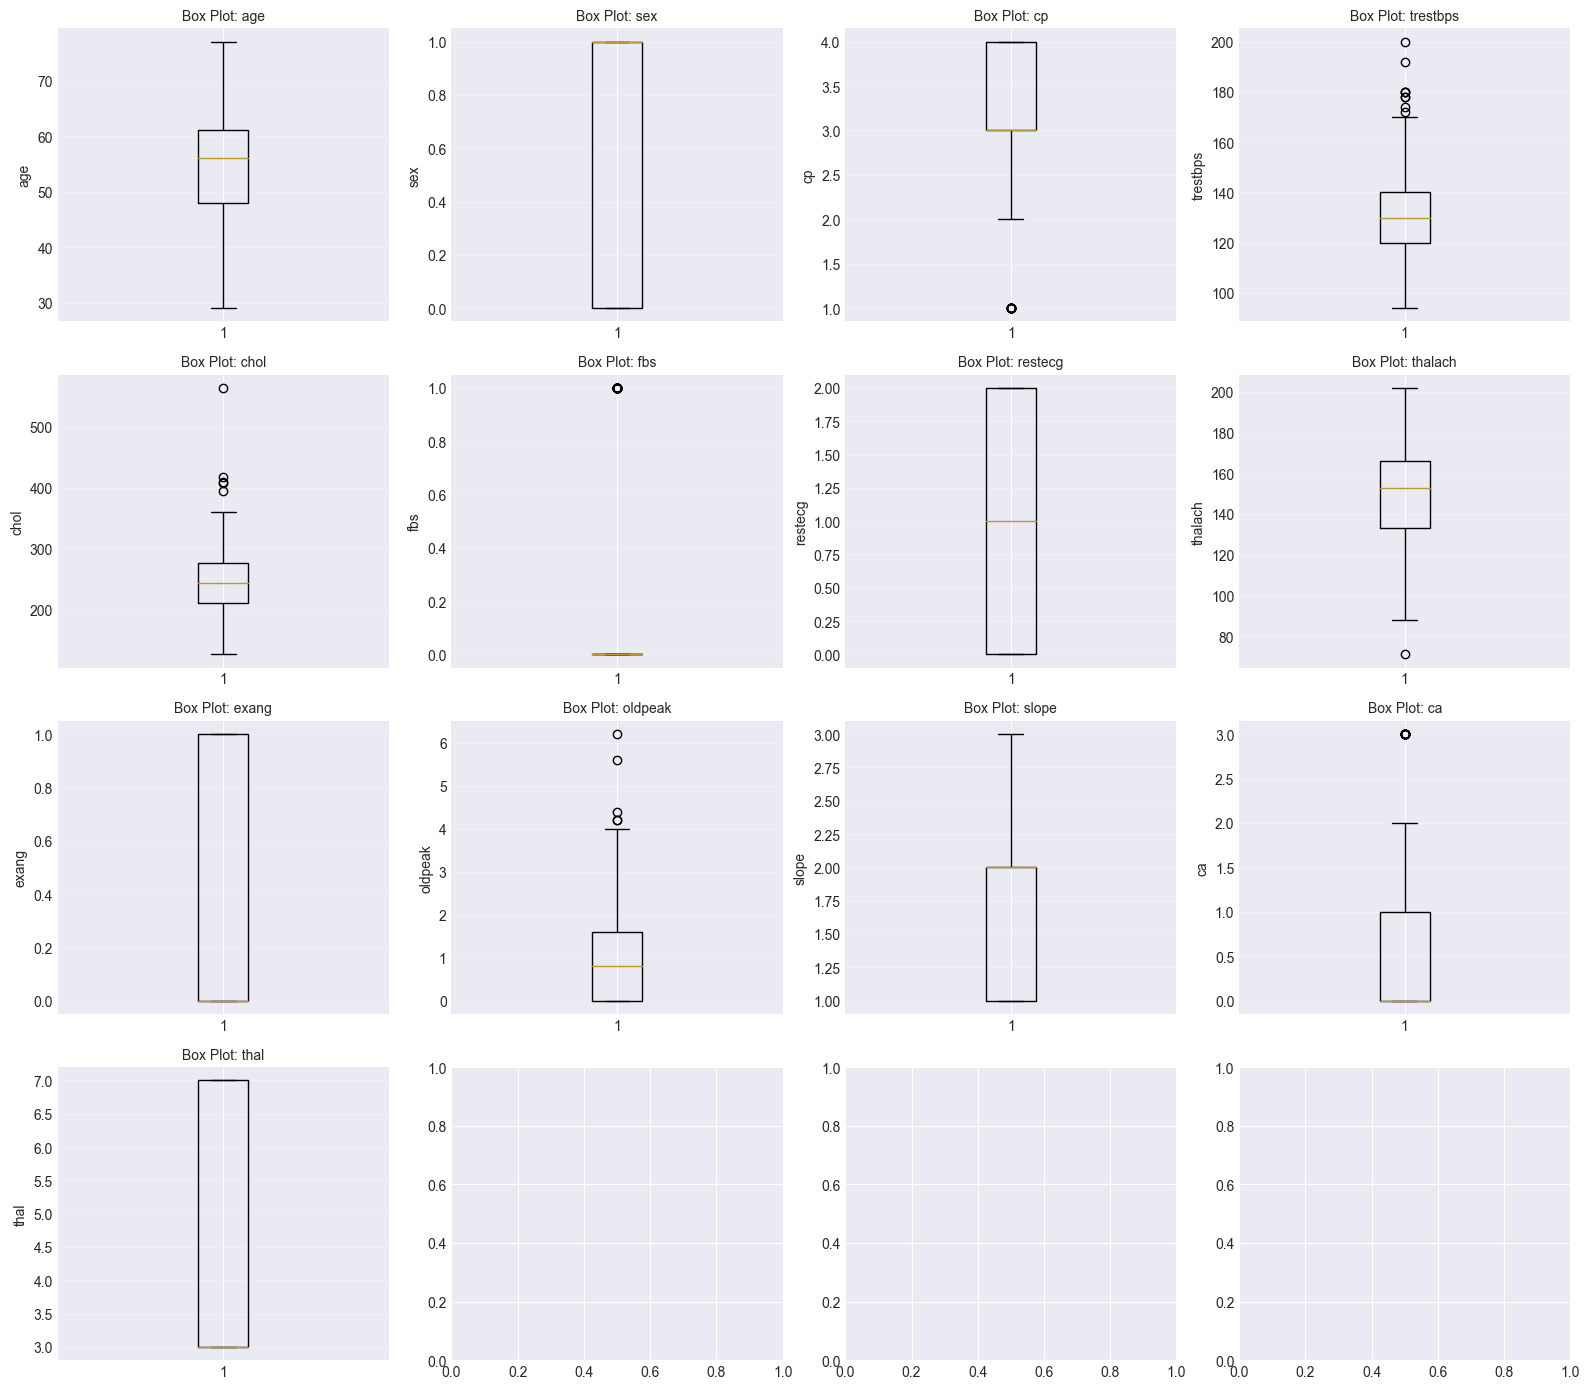

Outlier box plots saved!


In [8]:
# 4. Box plots for outlier detection
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(df_clean.columns):
    if col != 'target':
        axes[idx].boxplot(df_clean[col])
        axes[idx].set_title(f'Box Plot: {col}', fontsize=10)
        axes[idx].set_ylabel(col)
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../screenshots/04_outlier_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Outlier box plots saved!")

## 3. Data Preprocessing & Feature Engineering

Handle missing values, encode categorical features, and scale numerical features.

In [9]:
print("\n" + "=" * 60)
print("STEP 3: DATA PREPROCESSING & FEATURE ENGINEERING")
print("=" * 60)

from data.preprocessing import DataPreprocessor, split_features_target

# Separate features and target
X, y = split_features_target(df_clean, target_col='target')

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution: \n{y.value_counts()}")

# Create and fit preprocessor
preprocessor = DataPreprocessor()
X_preprocessed = preprocessor.fit_transform(X, y)

print(f"\nPreprocessed features shape: {X_preprocessed.shape}")
print(f"Feature names: {preprocessor.feature_names}")

# Save preprocessor
preprocessor.save('../models/artifacts/preprocessor.pkl')
print("Preprocessor saved!")


STEP 3: DATA PREPROCESSING & FEATURE ENGINEERING

Features shape: (297, 13)
Target shape: (297,)
Target distribution: 
target
0    160
1    137
Name: count, dtype: int64

Preprocessed features shape: (297, 13)
Feature names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Preprocessor saved to ../models/artifacts/preprocessor.pkl
Preprocessor saved!


In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Train target distribution:\n{pd.Series(y_train).value_counts()}")
print(f"Test target distribution:\n{pd.Series(y_test).value_counts()}")


Train set size: (237, 13)
Test set size: (60, 13)
Train target distribution:
target
0    128
1    109
Name: count, dtype: int64
Test target distribution:
target
0    32
1    28
Name: count, dtype: int64


## 4. Model Development & Training

Build and train Logistic Regression and Random Forest classifiers with hyperparameter tuning.

In [11]:
print("\n" + "=" * 60)
print("STEP 4: MODEL DEVELOPMENT & TRAINING")
print("=" * 60)

from models.train import ModelTrainer

# Initialize trainer
trainer = ModelTrainer(random_state=42)

# Train Logistic Regression
print("\n--- Training Logistic Regression ---")
lr_model = trainer.train_logistic_regression(X_train, y_train, C=1.0, solver='lbfgs')
print("Logistic Regression trained!")

# Train Random Forest
print("\n--- Training Random Forest ---")
rf_model = trainer.train_random_forest(X_train, y_train, n_estimators=100, max_depth=10)
print("Random Forest trained!")


STEP 4: MODEL DEVELOPMENT & TRAINING

--- Training Logistic Regression ---
Logistic Regression trained!

--- Training Random Forest ---
Random Forest trained!


In [12]:
# Hyperparameter Tuning with GridSearchCV
print("\n--- Hyperparameter Tuning ---")

# Tune Logistic Regression
print("\nTuning Logistic Regression...")
lr_params = {'C': [0.1, 1.0, 10.0], 'solver': ['lbfgs', 'liblinear']}
lr_grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), 
                       lr_params, cv=5, scoring='roc_auc', n_jobs=-1)
lr_grid.fit(X_train, y_train)
print(f"Best LR params: {lr_grid.best_params_}")
print(f"Best LR score: {lr_grid.best_score_:.4f}")

# Tune Random Forest
print("\nTuning Random Forest...")
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), 
                       rf_params, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print(f"Best RF params: {rf_grid.best_params_}")
print(f"Best RF score: {rf_grid.best_score_:.4f}")


--- Hyperparameter Tuning ---

Tuning Logistic Regression...
Best LR params: {'C': 0.1, 'solver': 'liblinear'}
Best LR score: 0.8848

Tuning Random Forest...
Best RF params: {'max_depth': 5, 'n_estimators': 200}
Best RF score: 0.9071


## 5. Model Evaluation & Comparison

Evaluate models using cross-validation and compare performance metrics.

In [13]:
print("\n" + "=" * 60)
print("STEP 5: MODEL EVALUATION & COMPARISON")
print("=" * 60)

# Evaluate best models on test set
lr_best = lr_grid.best_estimator_
rf_best = rf_grid.best_estimator_

lr_metrics = trainer.evaluate_model(lr_best, X_test, y_test, "Logistic Regression")
rf_metrics = trainer.evaluate_model(rf_best, X_test, y_test, "Random Forest")

print("\n--- Logistic Regression Metrics ---")
for key, value in lr_metrics.items():
    if key not in ['confusion_matrix', 'classification_report', 'model_name']:
        print(f"{key}: {value:.4f}")

print("\n--- Random Forest Metrics ---")
for key, value in rf_metrics.items():
    if key not in ['confusion_matrix', 'classification_report', 'model_name']:
        print(f"{key}: {value:.4f}")


STEP 5: MODEL EVALUATION & COMPARISON

--- Logistic Regression Metrics ---
accuracy: 0.8500
precision: 0.8800
recall: 0.7857
f1: 0.8302
roc_auc: 0.9509

--- Random Forest Metrics ---
accuracy: 0.8333
precision: 0.8750
recall: 0.7500
f1: 0.8077
roc_auc: 0.9442


In [14]:
# Cross-validation evaluation
print("\n--- Cross-Validation Results ---")

cv_lr = trainer.cross_validate_model(lr_best, X_train, y_train, cv_folds=5)
cv_rf = trainer.cross_validate_model(rf_best, X_train, y_train, cv_folds=5)

print("\nLogistic Regression CV Scores:")
for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    scores = cv_lr[f'test_{metric}']
    print(f"  {metric}: {scores.mean():.4f} (+/- {scores.std():.4f})")

print("\nRandom Forest CV Scores:")
for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    scores = cv_rf[f'test_{metric}']
    print(f"  {metric}: {scores.mean():.4f} (+/- {scores.std():.4f})")


--- Cross-Validation Results ---

Logistic Regression CV Scores:
  accuracy: 0.8185 (+/- 0.0661)
  precision: 0.8315 (+/- 0.0871)
  recall: 0.7693 (+/- 0.1045)
  f1: 0.7940 (+/- 0.0756)
  roc_auc: 0.8744 (+/- 0.0669)

Random Forest CV Scores:
  accuracy: 0.8099 (+/- 0.0716)
  precision: 0.8499 (+/- 0.1176)
  recall: 0.7420 (+/- 0.1097)
  f1: 0.7819 (+/- 0.0727)
  roc_auc: 0.8914 (+/- 0.0647)


In [15]:
# Model comparison visualization
from models.train import compare_models

models_dict = {'Logistic Regression': lr_best, 'Random Forest': rf_best}
comparison_df = compare_models(models_dict, X_test, y_test)

print("\n--- Model Comparison ---")
print(comparison_df.to_string(index=False))

# Save comparison
comparison_df.to_csv('../data/processed/model_comparison.csv', index=False)
print("\nComparison saved to model_comparison.csv")


--- Model Comparison ---
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.850000      0.880 0.785714  0.830189 0.950893
      Random Forest  0.833333      0.875 0.750000  0.807692 0.944196

Comparison saved to model_comparison.csv



Generating confusion matrix plots...
Confusion matrix saved to ../screenshots/05_confusion_matrix_lr.png
Confusion matrix saved to ../screenshots/06_confusion_matrix_rf.png


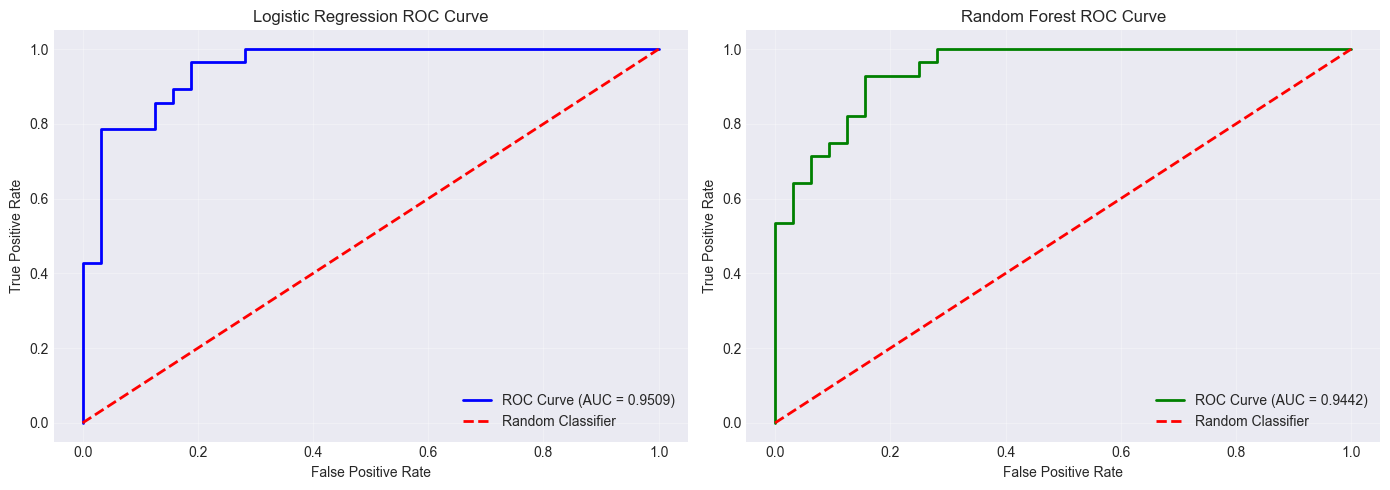

ROC curves saved!


In [16]:
# Plot confusion matrices
print("\nGenerating confusion matrix plots...")
trainer.plot_confusion_matrix(lr_metrics['confusion_matrix'], 
                             "Logistic Regression",
                             '../screenshots/05_confusion_matrix_lr.png')
trainer.plot_confusion_matrix(rf_metrics['confusion_matrix'], 
                             "Random Forest",
                             '../screenshots/06_confusion_matrix_rf.png')

# Plot ROC curves
from sklearn.metrics import roc_curve, auc

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LR ROC curve
y_pred_proba_lr = lr_best.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

axes[0].plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_lr:.4f})')
axes[0].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Logistic Regression ROC Curve')
axes[0].legend()
axes[0].grid(alpha=0.3)

# RF ROC curve
y_pred_proba_rf = rf_best.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

axes[1].plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.4f})')
axes[1].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Random Forest ROC Curve')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../screenshots/07_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("ROC curves saved!")

## 6. Experiment Tracking with MLflow

Log all experiments, parameters, metrics, and artifacts to MLflow.

In [17]:
print("\n" + "=" * 60)
print("STEP 6: EXPERIMENT TRACKING WITH MLFLOW")
print("=" * 60)

# Set tracking URI
mlflow.set_tracking_uri(uri='file:../mlruns')

# Create experiment
experiment_name = "heart_disease_prediction"
mlflow.set_experiment(experiment_name)

print(f"MLflow experiment: {experiment_name}")
print(f"MLflow tracking URI: {mlflow.get_tracking_uri()}")

# Log Logistic Regression run
print("\n--- Logging Logistic Regression Experiment ---")
with mlflow.start_run(run_name="LogisticRegression_v1"):
    # Log parameters
    mlflow.log_params({
        'model_type': 'LogisticRegression',
        'C': lr_grid.best_params_['C'],
        'solver': lr_grid.best_params_['solver'],
        'max_iter': 1000,
        'random_state': 42,
    })
    
    # Log metrics
    mlflow.log_metrics({
        'accuracy': lr_metrics['accuracy'],
        'precision': lr_metrics['precision'],
        'recall': lr_metrics['recall'],
        'f1_score': lr_metrics['f1'],
        'roc_auc': lr_metrics['roc_auc'],
    })
    
    # Log model
    mlflow.sklearn.log_model(lr_best, artifact_path="model")
    
    # Log confusion matrix plot
    mlflow.log_artifact('../screenshots/05_confusion_matrix_lr.png')
    
    print("Logistic Regression run logged!")

# Log Random Forest run
print("\n--- Logging Random Forest Experiment ---")
with mlflow.start_run(run_name="RandomForest_v1"):
    # Log parameters
    mlflow.log_params({
        'model_type': 'RandomForest',
        'n_estimators': rf_grid.best_params_['n_estimators'],
        'max_depth': rf_grid.best_params_['max_depth'],
        'random_state': 42,
    })
    
    # Log metrics
    mlflow.log_metrics({
        'accuracy': rf_metrics['accuracy'],
        'precision': rf_metrics['precision'],
        'recall': rf_metrics['recall'],
        'f1_score': rf_metrics['f1'],
        'roc_auc': rf_metrics['roc_auc'],
    })
    
    # Log model
    mlflow.sklearn.log_model(rf_best, artifact_path="model")
    
    # Log confusion matrix plot
    mlflow.log_artifact('../screenshots/06_confusion_matrix_rf.png')
    
    print("Random Forest run logged!")

print("\nMLflow runs logged successfully!")
print("To view experiments, run: mlflow ui --backend-store-uri file:../mlruns")


STEP 6: EXPERIMENT TRACKING WITH MLFLOW
MLflow experiment: heart_disease_prediction
MLflow tracking URI: file:../mlruns

--- Logging Logistic Regression Experiment ---
Logistic Regression run logged!

--- Logging Random Forest Experiment ---
Random Forest run logged!

MLflow runs logged successfully!
To view experiments, run: mlflow ui --backend-store-uri file:../mlruns


## 7. Model Packaging & Serialization

Save models and create reproducible pipelines with preprocessing.

In [18]:
print("\n" + "=" * 60)
print("STEP 7: MODEL PACKAGING & SERIALIZATION")
print("=" * 60)

# Save models
trainer.save_model(lr_best, '../models/artifacts/logistic_regression_model.pkl')
trainer.save_model(rf_best, '../models/artifacts/random_forest_model.pkl')

# Create and save a prediction wrapper
class PredictionPipeline:
    def __init__(self, preprocessor_path, model_path):
        self.preprocessor = joblib.load(preprocessor_path)
        self.model = joblib.load(model_path)
    
    def predict(self, X_raw):
        """Make predictions on raw data"""
        X_preprocessed = self.preprocessor.transform(X_raw)
        return self.model.predict(X_preprocessed)
    
    def predict_proba(self, X_raw):
        """Make probability predictions on raw data"""
        X_preprocessed = self.preprocessor.transform(X_raw)
        return self.model.predict_proba(X_preprocessed)

# Test the pipeline
pipeline = PredictionPipeline(
    '../models/artifacts/preprocessor.pkl',
    '../models/artifacts/random_forest_model.pkl'
)

# Make predictions on test set
sample_predictions = pipeline.predict(X_test[:5])
sample_proba = pipeline.predict_proba(X_test[:5])

print("\nSample Predictions (first 5 test samples):")
print(f"Predictions: {sample_predictions}")
print(f"Probabilities:\n{sample_proba}")

# Save pipeline wrapper
joblib.dump(pipeline, '../models/artifacts/prediction_pipeline.pkl')
print("\nPrediction pipeline saved!")

print("\nModel artifacts saved to: ../models/artifacts/")
print("  - logistic_regression_model.pkl")
print("  - random_forest_model.pkl")
print("  - preprocessor.pkl")
print("  - prediction_pipeline.pkl")


STEP 7: MODEL PACKAGING & SERIALIZATION
Model saved to ../models/artifacts/logistic_regression_model.pkl
Model saved to ../models/artifacts/random_forest_model.pkl

Sample Predictions (first 5 test samples):
Predictions: [0 0 0 0 0]
Probabilities:
[[0.75121287 0.24878713]
 [0.79877522 0.20122478]
 [0.73123073 0.26876927]
 [0.7786816  0.2213184 ]
 [0.75401332 0.24598668]]

Prediction pipeline saved!

Model artifacts saved to: ../models/artifacts/
  - logistic_regression_model.pkl
  - random_forest_model.pkl
  - preprocessor.pkl
  - prediction_pipeline.pkl


## 8. Model Predictions

Use model for inference.

In [19]:
print("\n" + "=" * 60)
print("STEP 8: MODEL PREDICTIONS")
print("=" * 60)

# Sample API test data
sample_patient_data = {
    'age': 63,
    'sex': 1,
    'cp': 3,
    'trestbps': 145,
    'chol': 233,
    'fbs': 1,
    'restecg': 0,
    'thalach': 150,
    'exang': 0,
    'oldpeak': 2.3,
    'slope': 0,
    'ca': 0,
    'thal': 1
}

# Create a DataFrame for the sample
sample_df = pd.DataFrame([sample_patient_data])
print("\nSample input data:")
print(sample_df)

# Make prediction
prediction = pipeline.predict(sample_df)[0]
probability = pipeline.predict_proba(sample_df)[0]

print(f"\nModel Prediction: {'Disease Present' if prediction == 1 else 'No Disease'}")
print(f"Confidence scores: No Disease: {probability[0]:.4f}, Disease: {probability[1]:.4f}")
print(f"Prediction confidence: {max(probability):.4f}")


STEP 8: MODEL PREDICTIONS

Sample input data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   

   ca  thal  
0   0     1  

Model Prediction: No Disease
Confidence scores: No Disease: 0.7787, Disease: 0.2213
Prediction confidence: 0.7787
